# Maximizing Revenue For Taxi Cab Drivers Through Payment Type Analysis 

## Problem Statement

In the fast-paced taxi booking sector,making the most of the revenue is essential for long term success and driver happiness.Our goal is to use data-driven insight to 
maximise revenue stremes for taxi drivers in order to meet this need.Our research aims to determine whether payment methods have an impact on fair pricing by focusing 
on the relationship between payment type and fare amount.

## Objective

This projects main goal is to run A/B test to eximine the relationship between the total fare and the method of payment.Wtiee use Python hypothesis testing and  statistics 
to extract useful information that can help drivers to generate more cash.In particular,We want to find out if there is a big differnece in the fares for those who pay with cash.

## Research Quation

Is their a relationship between total fare and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers,without negatively impacting
customer experience?

## Importing Libraries

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

## Loading The Dataset

In [2]:
df = pd.read_csv('Downloads/yellow_tripdata_2020-01.csv')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Exploratory Data Analysis

In [4]:
#checking the size of dataset
df.shape

(6405008, 18)

In [5]:
#checking the data types
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
#converting tpep_pickup_datetime and tpep_dropoff_datetime datatype into datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])


In [7]:
#calculating the travel duration
df['Duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['Duration']=df['Duration'].dt.total_seconds()/60

In [8]:
#extracting the reqired columnes from the dataset for the further analysis
df=df[['passenger_count','trip_distance','payment_type','fare_amount','Duration']]
df

,passenger_count,trip_distance,payment_type,fare_amount,Duration
0,1.0,1.20,1.0,6.00,4.800000
1,1.0,1.20,1.0,7.00,7.416667
2,1.0,0.60,1.0,6.00,6.183333
3,1.0,0.80,1.0,5.50,4.850000
4,1.0,0.00,2.0,3.50,2.300000
...,...,...,...,...,...
6405003,NaN,3.24,NaN,17.59,31.000000
6405004,NaN,22.13,NaN,46.67,76.000000
6405005,NaN,10.51,NaN,48.85,27.833333
6405006,NaN,5.49,NaN,27.17,22.650000


In [9]:
#checking for null Values 
df.isnull().sum()

passenger_count    65441
trip_distance          0
payment_type       65441
fare_amount            0
Duration               0
dtype: int64

In [10]:
#checking the %contribution of null values in the data
(65441/len(df))*100

1.021716132126611

In [11]:
#the null values contributes very less around 1.02% to the dataset so we will drop the null values from the dataset
df.dropna(inplace= True)

In [12]:
# Passenger count and payment type can not be a float values so we will covertes their datatypes to integer
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')

In [13]:
#checking for the duplicate values in our dataset
df.duplicated().sum()

3331706

In [14]:
#from 6405008 values 3331706 values are duplicates and duplicates value contribute nothing to our analysis so we will drop all the duplicate values
df.drop_duplicates(inplace=True)

In [15]:
#checking the % wise contributions of passenger counts
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [16]:
#we can see that the passenger count 0 and 6,7,8,9 are not expected and they are possibly outeliers so we will remove it
df=df[(df['passenger_count']>0) & (df['passenger_count']<6)]

In [17]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    6.764307e-01
2    3.093476e-01
3    8.654819e-03
4    5.566598e-03
5    3.545604e-07
Name: proportion, dtype: float64

In [18]:
# we only need payment type 1 and 2 for analysis so we will remove payment type 3,4,5 from the data
df=df[df['payment_type']<3]

In [19]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [20]:
df.describe()

,passenger_count,trip_distance,fare_amount,Duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,4.536729e+00,1.780567e+01,2.415478e+01
std,1.176652e+00,4.895890e+00,1.506997e+01,9.260031e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-2.770367e+03
25%,1.000000e+00,1.500000e+00,9.000000e+00,9.883333e+00
50%,1.000000e+00,2.730000e+00,1.300000e+01,1.573333e+01
75%,2.000000e+00,5.470000e+00,2.100000e+01,2.336667e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


In [21]:
#we can see that minimum value of trip distance fare amount and duration are neagtive which is not possible so we will remove nagative values 
df=df[df['trip_distance']>0]
df=df[df['fare_amount']>0]
df=df[df['Duration']>0]

In [22]:
# Removing Outliers from the dataset using IQR
for col in ['fare_amount','trip_distance','Duration']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR
    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

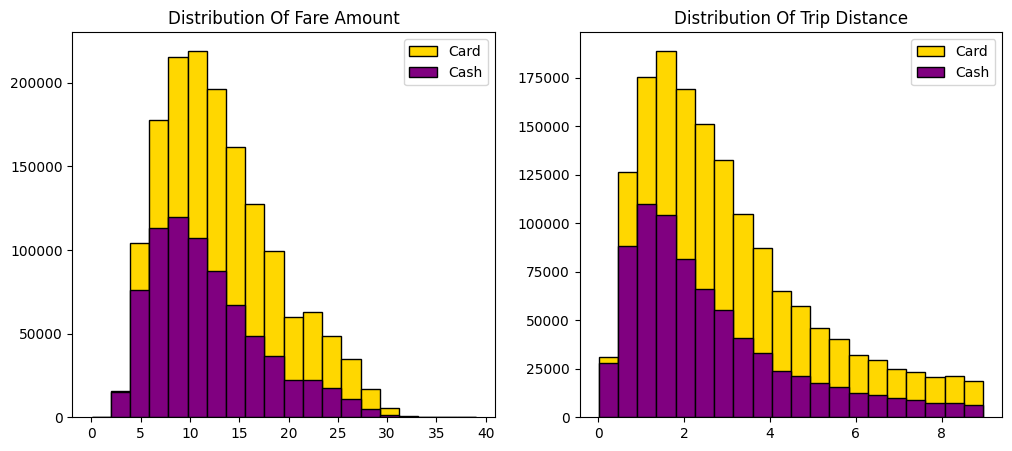

In [23]:
#creating histogrames to visulize the distribution of fair amount and distribution of trip distance by payment method card and cash

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution Of Fare Amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='gold',label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='purple',label='Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution Of Trip Distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='gold',label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='purple',label='Cash')
plt.legend()

plt.show()

In [24]:
#Finding mean and std of fare_amount and trip_distance based on payment type card and cash
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

#we can see that mean and std of card is higher in comparision of cash.People prefare to payment by card on longer trip distance

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

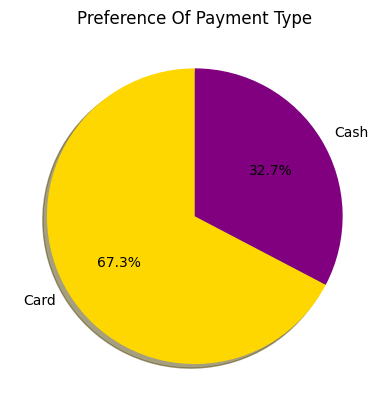

In [25]:
# For preference of payment type we will plot pie chart
plt.title('Preference Of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels=df['payment_type'].value_counts().index,
    startangle = 90,shadow=True,autopct='%1.1f%%',colors=['gold','purple'])
plt.show()

#we can see from below chart that 66.9% of people choose card as payment type

In [26]:
#creating a new dataframe to find percentage wise distribution of payment type with different passenger count
passenger_count=df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)
passenger_count['percentage']=(passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,percentage
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [27]:
#creating a new dataframe to Visualise percentage wise distribution of payment type with different passenger count
df1=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
df1['payment_type']=['Card','Cash']
df1.iloc[0,1:]=passenger_count.iloc[0:5,-1]
df1.iloc[1,1:]=passenger_count.iloc[5:,-1]
df1

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


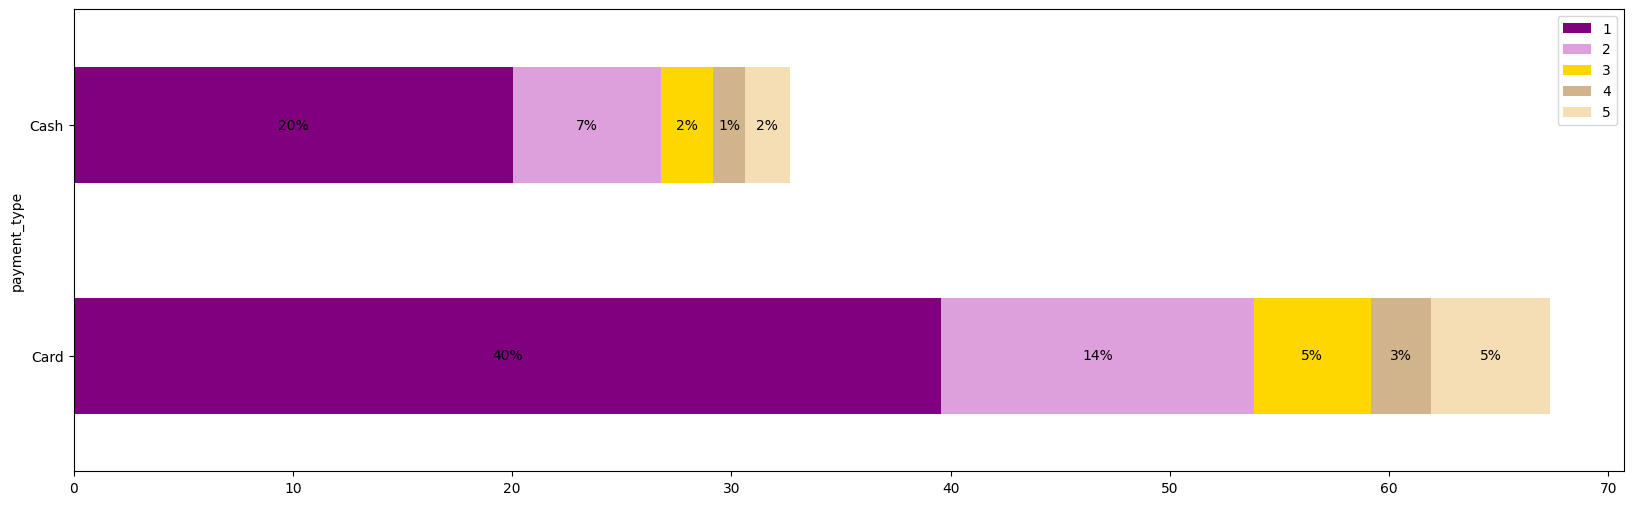

In [66]:
fig,ax=plt.subplots(figsize=(20,6))
df1.plot(x='payment_type',kind='barh',stacked=True,ax=ax,color=['purple','plum','gold','tan','wheat'])

#add percentage value text
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y = p.get_xy()
    ax.text(x+width/2,y+height/2,'{:.0f}%'.format(width),
           horizontalalignment='center',verticalalignment='center')
 #from the bellow graph we can see that single passenger has biggest contribution in taxi rides

* **Null hypothesis**:There is no difference in avarage fare between customer who use credit card and customer who use cash
* **Alternate hypothesis**:There is difference in avarage fare between customer who use credit card and customer who use cash

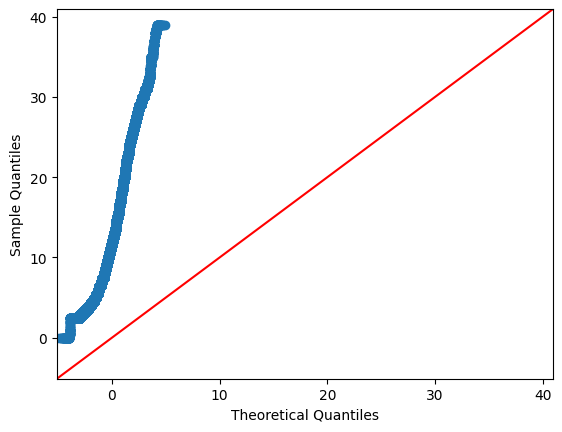

In [29]:
#checking wether the data is normaly distributed or not 
sm.qqplot(df['fare_amount'],line='45')
plt.show()
#we can see from bellow graph that data is not normaly distributed

In [30]:
#we will use T-test for hypothesis testing 
card_sample=df[df['payment_type']=='Card']['fare_amount']
cash_sample=df[df['payment_type']=='Cash']['fare_amount']
t_stats,p_value =st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False)
print('T Statistics',t_stats,'P value',p_value)

T Statistics 169.2111527245052 P value 0.0


**The p-value is less than the default significance level of 0.05, which indicates that the probability of such an extreme outcome is close to zero and that the null hypothesis can be rejected.**